In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical exam.csv')

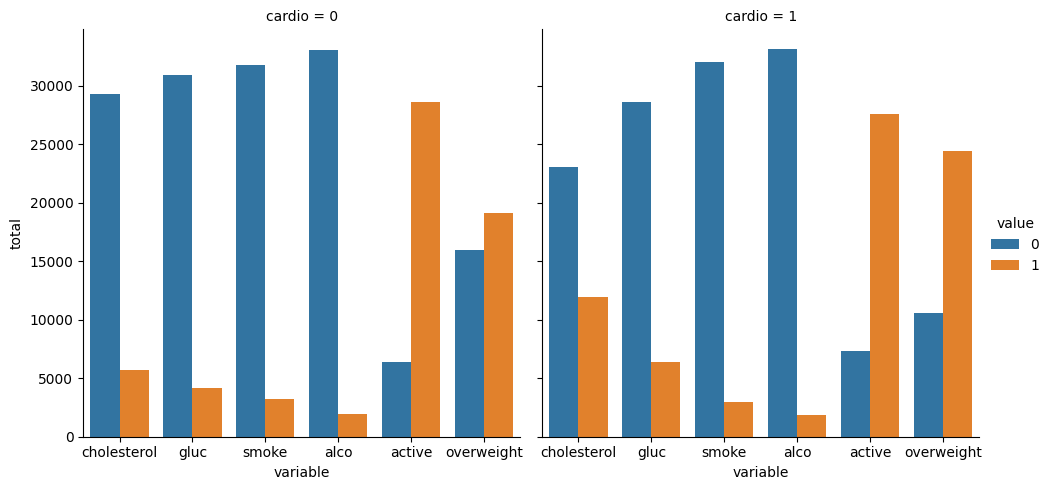

In [19]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

def draw_cat_plot():
    features  =  ["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]
    df_cat  =  pd.melt(df, id_vars = "cardio", value_vars = features)
    df_cat  =  df_cat.value_counts().reset_index(name = "total")
    df_cat['value']  =  df_cat['value'].astype(str)

    sns.catplot(data = df_cat, x = "variable", y = "total",
        hue = "value", col = "cardio", kind = "bar", order = features)\
            .set_axis_labels("variable", "total")
    
    plt.show()

draw_cat_plot()


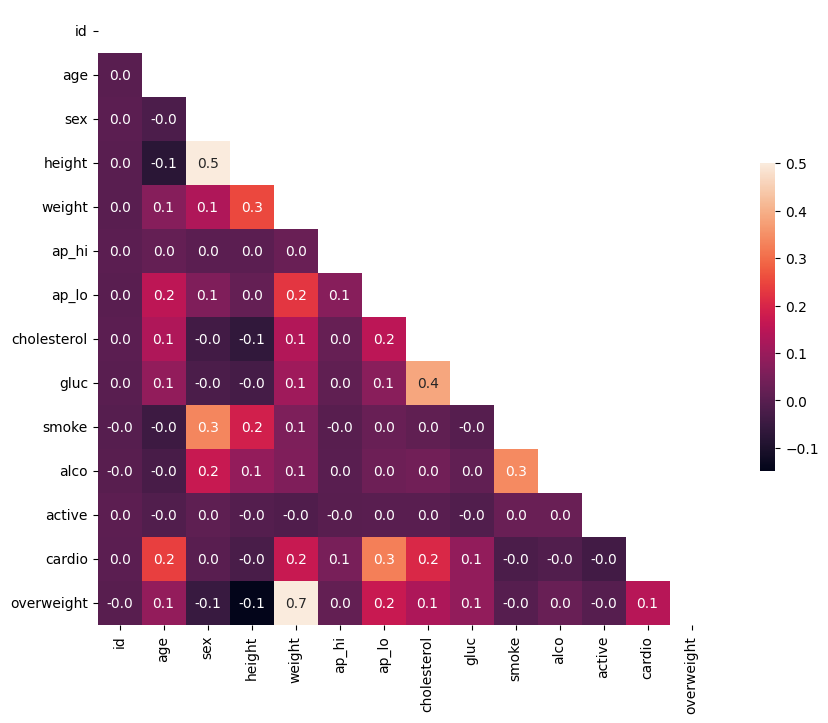

In [20]:
def draw_heat_map():
    df_heat = df[(df["ap_lo"] <= df["ap_hi"]) &
        (df["height"].between(df["height"].quantile(0.025), df["height"].quantile(0.975))) &
        (df["weight"].between(df["weight"].quantile(0.025), df["weight"].quantile(0.975)))]

    corr  =  df_heat.corr()

    mask  =  np.triu(np.ones_like(corr, dtype = bool))

    plt.figure(figsize = (12, 8))
    sns.heatmap(corr, mask = mask, annot = True, fmt = ".1f", 
                square = True, vmax = 0.5, cbar_kws = {"shrink": .5})
    plt.show()

draw_heat_map()